In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.drop(["availability", "society"], axis=1, inplace=True)
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df["balcony"].fillna(df["balcony"].mean(), inplace=True)
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [10]:
df["bath"].fillna(df["bath"].mean(), inplace=True)
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df["room"] = df["size"].apply(lambda x: x.split(" ")[0])
df

,area_type,location,size,total_sqft,bath,balcony,price,room
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,1.584376,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4


In [13]:
df["room"] = df["room"].apply(lambda x: int(x))
df.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
room            int64
dtype: object

In [14]:
df.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
room            int64
dtype: object

In [15]:
df["balcony"] = df["balcony"].apply(lambda x: int(x))

In [16]:
df.shape

(13303, 8)

In [17]:
df.drop(["area_type"], axis=1, inplace=True)
df

,location,size,total_sqft,bath,balcony,price,room
0,Electronic City Phase II,2 BHK,1056,2.0,1,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1,95.00,3
4,Kothanur,2 BHK,1200,2.0,1,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,1,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1,488.00,4


In [18]:
df[df.room>10]["total_sqft"].apply(lambda x: float(x))/df[df.room>10]["room"]

459      454.545455
1718     296.296296
1768     109.090909
3379     105.263158
3609     625.000000
3853     109.090909
4684      55.813953
4916      89.285714
6533     186.000000
7979     545.454545
9935     417.307692
11559     66.666667
dtype: float64

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return np.mean([float(tokens[0]), float(tokens[1])])
    try:
        return float(x)
    except:
        pass    

In [20]:
df2 = df.copy()
df2["total_sqft"] = df2["total_sqft"].apply(convert_sqft_to_num)
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony               0
price             186.0
room                  4
Name: 30, dtype: object

In [21]:
df2["price_per_sqft"] = df2["price"]*100_000/df2["total_sqft"]
df2

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,1,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1,488.00,4,10407.336319


In [22]:
len(df2.location.unique())

1304

In [23]:
location_stats = df2.groupby("location").location.agg("count").sort_values(ascending=False)
location_stats

location
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [24]:
len(location_stats[location_stats<10])

1051

In [25]:
len(df2.location.unique())-len(location_stats[location_stats<10])

253

In [26]:
len(df2.location.apply(lambda x: "other" if x in location_stats[location_stats<10] else x).unique())

254

In [27]:
df2["location"] = df2.location.apply(lambda x: "other" if x in location_stats[location_stats<10] else x)

In [28]:
df2.head(10)

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,1,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,1,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,1,370.00,6,36274.509804


In [29]:
df2.shape

(13303, 8)

In [30]:
df2[df2.total_sqft/df2.room<300]
df3 = df2[~(df2.total_sqft/df2.room<300)]
df3.shape

(12559, 8)

In [31]:
df3

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,1,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1,488.00,4,10407.336319


In [32]:
df3.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
df3.shape

(12559, 8)

In [34]:
df_out = pd.DataFrame()
for key, subdf in df3.groupby("location"):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df], ignore_index=True)
df4 = df_out

In [35]:
for i in df3:
    print(i)

location
size
total_sqft
bath
balcony
price
room
price_per_sqft


In [36]:
reduced_df

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
18,other,3 BHK,2770.0,4.0,2,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,2,48.00,2,4363.636364
24,other,1 RK,510.0,1.0,0,25.25,1,4950.980392
25,other,3 BHK,1250.0,3.0,2,56.00,3,4480.000000
49,other,2 BHK,869.0,2.0,1,36.00,2,4142.692750
...,...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,2,110.00,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,2,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,2,48.00,2,4465.116279


In [37]:
df4

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2,65.00,3,4561.403509
...,...,...,...,...,...,...,...,...
10266,other,2 BHK,1353.0,2.0,2,110.00,2,8130.081301
10267,other,1 Bedroom,812.0,1.0,0,26.00,1,3201.970443
10268,other,3 BHK,1440.0,2.0,2,63.93,3,4439.583333
10269,other,2 BHK,1075.0,2.0,2,48.00,2,4465.116279


In [38]:
df4.shape

(10271, 8)

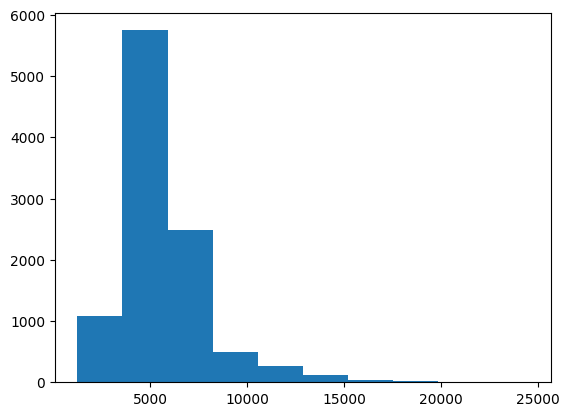

In [39]:
plt.hist(df4.price_per_sqft)
plt.show()

In [40]:
df4.shape

(10271, 8)

In [41]:
df4.bath.unique()

array([ 2.        ,  3.        ,  4.        ,  5.        ,  8.        ,
        1.        ,  6.        , 14.        ,  2.69260965,  7.        ,
        9.        , 12.        , 16.        , 13.        ])

In [42]:
df4.loc[(df4["bath"] > 2) & (df4["bath"] < 3), "bath"] = 2

In [43]:
df4.bath.value_counts()

bath
2.0     5960
3.0     2615
4.0      677
1.0      615
5.0      237
6.0      107
7.0       27
8.0       17
9.0       10
12.0       3
14.0       1
16.0       1
13.0       1
Name: count, dtype: int64

In [44]:
df4.describe()

,total_sqft,bath,balcony,price,room,price_per_sqft
count,10271.000000,10271.000000,10271.000000,10271.000000,10271.000000,10271.000000
mean,1509.118801,2.473858,1.571317,91.710092,2.576283,5670.250166
std,882.474896,0.987494,0.790862,88.350870,0.901475,2290.833302
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,1.000000,49.000000,2.000000,4250.000000
50%,1285.000000,2.000000,2.000000,67.000000,2.000000,5177.304965
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6433.765573
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [45]:
df4[df4.total_sqft == df4.total_sqft.min()]

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
5302,Nagarbhavi,1 BHK,300.0,1.0,1,20.0,1,6666.666667


In [46]:
df4.shape

(10271, 8)

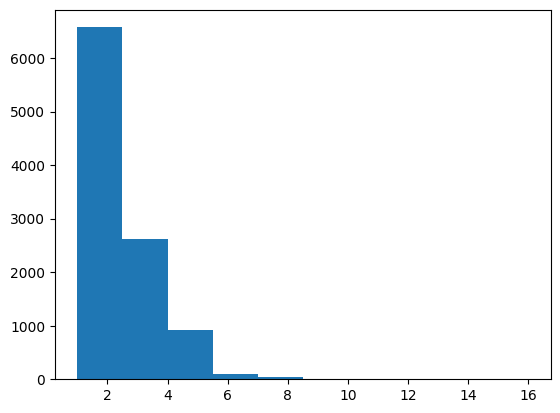

In [47]:
plt.hist(df4.bath)
plt.show()

# if bathroom is greater than bedroom+2 it is an outlier

In [48]:
df4[(df4.bath>df4.room+2)]

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
597,BTM 1st Stage,9 Bedroom,3300.0,14.0,1,500.0,9,15151.515152
1661,Chikkabanavar,4 Bedroom,2460.0,7.0,2,80.0,4,3252.032520
5328,Nagasandra,4 Bedroom,7000.0,8.0,1,450.0,4,6428.571429
6813,Thanisandra,3 BHK,1806.0,6.0,2,116.0,3,6423.034330
8509,other,6 BHK,11338.0,9.0,1,1000.0,6,8819.897689


In [49]:
df5 = df4[~(df4.bath>df4.room+2)]
df5

,location,size,total_sqft,bath,balcony,price,room,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2,65.00,3,4561.403509
...,...,...,...,...,...,...,...,...
10266,other,2 BHK,1353.0,2.0,2,110.00,2,8130.081301
10267,other,1 Bedroom,812.0,1.0,0,26.00,1,3201.970443
10268,other,3 BHK,1440.0,2.0,2,63.93,3,4439.583333
10269,other,2 BHK,1075.0,2.0,2,48.00,2,4465.116279


In [50]:
df5.drop(["size", "price_per_sqft"], axis=1, inplace=True)
df5

C:\Users\emirk\AppData\Local\Temp\ipykernel_44880\2674428695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(["size", "price_per_sqft"], axis=1, inplace=True)


,location,total_sqft,bath,balcony,price,room
0,Devarachikkanahalli,1250.0,2.0,3,44.00,3
1,Devarachikkanahalli,1250.0,2.0,2,40.00,2
2,Devarachikkanahalli,1200.0,2.0,2,83.00,2
3,Devarachikkanahalli,1170.0,2.0,2,40.00,2
4,Devarachikkanahalli,1425.0,2.0,2,65.00,3
...,...,...,...,...,...,...
10266,other,1353.0,2.0,2,110.00,2
10267,other,812.0,1.0,0,26.00,1
10268,other,1440.0,2.0,2,63.93,3
10269,other,1075.0,2.0,2,48.00,2


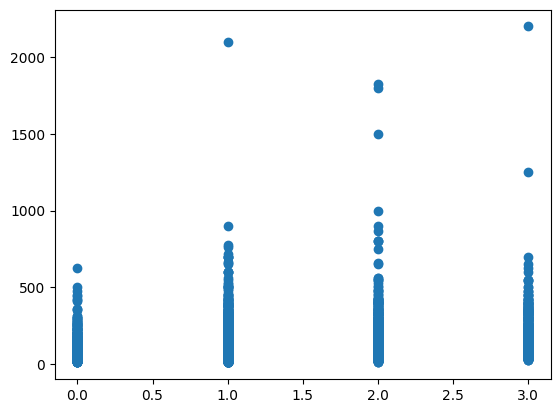

In [51]:
plt.scatter(df5.balcony, df5.price)

In [52]:
df5[df5.price>1000]

,location,total_sqft,bath,balcony,price,room
1736,Cunningham Road,5270.0,4.0,3,1250.0,4
1745,Cunningham Road,7500.0,6.0,2,1800.0,4
1875,Dodsworth Layout,30000.0,4.0,1,2100.0,4
1881,Dodsworth Layout,30400.0,4.0,2,1824.0,6
4972,Malleshwaram,12000.0,7.0,3,2200.0,7
6016,Sadashiva Nagar,7500.0,5.0,2,1500.0,5


In [147]:
df5.location = df5.location.apply(lambda x: x.strip())

C:\Users\emirk\AppData\Local\Temp\ipykernel_44880\3767644928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x: x.strip())


In [155]:
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [156]:
df6 = pd.concat([df5, dummies.drop(["other"], axis=1)],axis=1)
df6

,location,total_sqft,bath,balcony,price,room,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,3,44.00,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Devarachikkanahalli,1250.0,2.0,2,40.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2,83.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2,40.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2,65.00,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,other,1353.0,2.0,2,110.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10267,other,812.0,1.0,0,26.00,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10268,other,1440.0,2.0,2,63.93,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10269,other,1075.0,2.0,2,48.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
df6.drop(["location"], axis=1, inplace=True)
df6

,total_sqft,bath,balcony,price,room,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,44.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2,40.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,83.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,40.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2,65.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,1353.0,2.0,2,110.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10267,812.0,1.0,0,26.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10268,1440.0,2.0,2,63.93,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10269,1075.0,2.0,2,48.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
X = df6.drop("price", axis=1)
y = df6.price

In [159]:
X.shape

(10266, 257)

In [160]:
y.shape

(10266,)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [193]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.812734642207569

In [163]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(estimator=LinearRegression(),X=X,y=y, cv=cv)

array([0.79885066, 0.81060161, 0.78761013, 0.77069019, 0.776211  ])

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [120]:
def find_best_model_using_gridsearchcv(X,y):
    model_params = {
        "random_forest":{
            "model":RandomForestRegressor(),
            "params":{
                "n_estimators":[10,50,100],
                "criterion":["squared_error","friedman_mse"]
            }
        },
        "decision_tree":{
            "model": DecisionTreeRegressor(),
            "params":{
                "criterion":["squared_error", "friedman_mse"],
                "splitter":["best","random"],
                "max_depth":[None, 100],
                "max_features":[None, "sqrt", "log2", "auto"]
            }
        },
        "linear_regression":{
            "model": LinearRegression(),
            "params":{
            }
        },
        "lasso":{
            "model": Lasso(),
            "params":{
                "alpha": [1,2],
                "selection": ["random", "cyclic"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for model_name, config in model_params.items():
        clf = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        clf.fit(X,y)
        scores.append({
            "model": model_name,
            "best_score":clf.best_score_,
            "best_params":clf.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


In [121]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

,model,best_score,best_params
0,random_forest,0.738702,"{'criterion': 'squared_error', 'n_estimators':..."
1,decision_tree,0.666820,"{'criterion': 'squared_error', 'max_depth': No..."
2,linear_regression,0.788793,{}
3,lasso,0.616421,"{'alpha': 1, 'selection': 'random'}"


In [124]:
model_params = {
    "linear_regression":{
        "model": LinearRegression(),
        "params":{
            "fit_intercept":[True, False],
            "copy_X":[True,False],
            "positive":[True,False]
        }
    }
}
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for model_name, config in model_params.items():
    clf = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        "model": model_name,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })

pd.DataFrame(scores, columns=["model", "best_score", "best_params"]).best_params[0]

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [170]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'room', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [166]:
df6

,total_sqft,bath,balcony,price,room,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,44.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2,40.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,83.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,40.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2,65.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,1353.0,2.0,2,110.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10267,812.0,1.0,0,26.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10268,1440.0,2.0,2,63.93,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10269,1075.0,2.0,2,48.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
np.where(X.columns=="Vijayanagar")[0][0]

247

In [210]:
def predict_price(location,sqft,bath,balcony,room):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = room
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_model.predict([x])[0]

In [211]:
predict_price("Devarachikkanahalli",15,1,2,3)

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-53.39189461521319

In [215]:
predict_price("1st Phase JP Nagar",1000,2,2,3)

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.08758495619166

In [222]:
predict_price("1st Phase JP Nagar",1000,3,0,3)

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.323670673832

In [226]:
predict_price("Indira Nagar",1000,2,0,2)

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


175.18136836714913

In [230]:
predict_price("Indira Nagar",1000,3,0,3)

C:\Users\emirk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


170.9811496063157

In [232]:
import pickle
with open("banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr_model,f)

In [233]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))